Importar Bibliotecas

In [17]:
import pandas as pd
import requests
import json
import re
import os
import matplotlib.pyplot as plt

Visualizando os dados do Json

In [18]:
import pandas as pd

caminho = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\atividade-pratica-1\meios_pagamentos_trimestral\data\meios_pagamentos_trimestrais.json"
df = pd.read_json(caminho)
print(df.head())

                                      @odata.context  \
0  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
1  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
2  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
3  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
4  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   

                                               value  
0  {'datatrimestre': '2025-06-30', 'valorPix': 83...  
1  {'datatrimestre': '2025-03-31', 'valorPix': 74...  
2  {'datatrimestre': '2024-12-31', 'valorPix': 77...  
3  {'datatrimestre': '2024-09-30', 'valorPix': 69...  
4  {'datatrimestre': '2024-06-30', 'valorPix': 62...  


Transformar o arquivo Json em Dataframe

In [19]:
# Caminho para o JSON bruto
caminho_json = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\atividade-pratica-1\meios_pagamentos_trimestral\data\meios_pagamentos_trimestrais.json"

# Ler o JSON e carregar os dados da chave 'value'
with open(caminho_json, "r", encoding="utf-8") as f:
    dados = json.load(f)

# Transformar o JSON em DataFrame
df = pd.DataFrame(dados["value"])

# Exibir as 5 primeiras linhas para conferência
df.head()

,datatrimestre,valorPix,valorTED,quantidadePix,quantidadeTED,quantidadeCheque,quantidadeBoleto
0,2025-06-30,8368791.95,11392855.71,19385613.70,191105.41,35801.16,1413940.40
1,2025-03-31,7472949.56,10767686.14,17540035.11,185476.04,37574.43,1396368.77
2,2024-12-31,7714123.67,11647265.67,17960829.67,211017.52,41511.28,1459098.04
3,2024-09-30,6976429.47,11180217.68,16546427.27,203394.26,44243.73,1466669.26
4,2024-06-30,6284296.05,10662555.73,15356890.92,203269.58,44981.97,1439060.28


Extrair os dados do JSON e tratar para CSV

In [20]:
# === Caminhos ===
caminho_json = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\atividade-pratica-1\meios_pagamentos_trimestral\data\meios_pagamentos_trimestrais.json"
pasta_tratados = os.path.join(os.path.dirname(caminho_json), "..", "tratados")
os.makedirs(pasta_tratados, exist_ok=True)
caminho_csv = os.path.join(pasta_tratados, "meios_pagamentos_tratado.csv")

# === Ler JSON e acessar a chave 'value' ===
with open(caminho_json, "r", encoding="utf-8") as f:
    dados = json.load(f)

df = pd.DataFrame(dados["value"])  # pega somente os dados

# === Converter coluna AnoMes para datetime e ordenar ===
df["datatrimestre"] = pd.to_datetime(df["datatrimestre"], errors="coerce")
df["datatrimestre"] = df["datatrimestre"].dt.strftime("%Y-%m")
df = df.sort_values("datatrimestre")

# === Garantir que colunas numéricas sejam números ===
def to_num(x):
    if pd.isna(x): 
        return x
    s = str(x).strip()
    s = s.replace(".", "").replace(",", ".")          # remove separador de milhar, troca decimal vírgula por ponto
    s = re.sub(r"[^0-9\.\-]", "", s)                  # remove símbolos extras
    try:
        return float(s)
    except:
        return pd.NA

for col in df.columns:
    low = col.lower()
    if low.startswith("quantidade") or low.startswith("valor"):
        df[col] = df[col].map(to_num)

# === Salvar CSV tratado ===
df.to_csv(caminho_csv, index=False, encoding="utf-8")
print("✅ CSV tratado salvo com sucesso!")
print("📂 Local:", caminho_csv)
df.head()


✅ CSV tratado salvo com sucesso!
📂 Local: C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\atividade-pratica-1\meios_pagamentos_trimestral\data\..\tratados\meios_pagamentos_tratado.csv


,datatrimestre,valorPix,valorTED,quantidadePix,quantidadeTED,quantidadeCheque,quantidadeBoleto
25,2019-03,0.0,503938073.0,0.0,19972726.0,13962122.0,102058381.0
24,2019-06,0.0,570073979.0,0.0,23264416.0,13815892.0,107681311.0
23,2019-09,0.0,628570144.0,0.0,27665606.0,13832267.0,115511273.0
22,2019-12,0.0,656004273.0,0.0,3243499.0,13472584.0,11903978.0
21,2020-03,0.0,665213513.0,0.0,3293862.0,11523783.0,118451067.0


Verificando valores nulos e exibindo os tipos de dados em df:

In [21]:
print("Contagem de Valores NULOS:")
print(df.isnull().sum())

print("\nTipos de Dados:")
print(df.dtypes)

Contagem de Valores NULOS:
datatrimestre       0
valorPix            0
valorTED            0
quantidadePix       0
quantidadeTED       0
quantidadeCheque    0
quantidadeBoleto    0
dtype: int64

Tipos de Dados:
datatrimestre        object
valorPix            float64
valorTED            float64
quantidadePix       float64
quantidadeTED       float64
quantidadeCheque    float64
quantidadeBoleto    float64
dtype: object


# Renomeando colunas

In [26]:
dados_df = df.rename(columns={"quantidadePix": "qntPix","quantidadeTED": "qntTED","quantidadeCheque":"qntCheque","quantidadeBoleto":"qntBoleto","datatrimestre":"AnoMes"})

print(dados_df)

     AnoMes     valorPix      valorTED        qntPix      qntTED   qntCheque  \
25  2019-03          0.0  5.039381e+08  0.000000e+00  19972726.0  13962122.0   
24  2019-06          0.0  5.700740e+08  0.000000e+00  23264416.0  13815892.0   
23  2019-09          0.0  6.285701e+08  0.000000e+00  27665606.0  13832267.0   
22  2019-12          0.0  6.560043e+08  0.000000e+00   3243499.0  13472584.0   
21  2020-03          0.0  6.652135e+08  0.000000e+00   3293862.0  11523783.0   
20  2020-06          0.0  6.267004e+08  0.000000e+00  38138651.0   8535507.0   
19  2020-09          0.0  7.503982e+08  0.000000e+00   5411577.0   8696627.0   
18  2020-12   14989491.0  8.036705e+08  1.762066e+07  57487966.0   9159482.0   
17  2021-03   62504652.0  7.894414e+08  8.623379e+07  35417147.0   7940962.0   
16  2021-06   11057352.0  8.566787e+08  1.871564e+08  33391774.0   7541798.0   
15  2021-09  155691622.0  9.257046e+08  2.863337e+08  29620034.0    801108.0   
14  2021-12  191641868.0  9.807293e+08  

Evolução Trimestral do Pix x TED x Cheque x Boleto

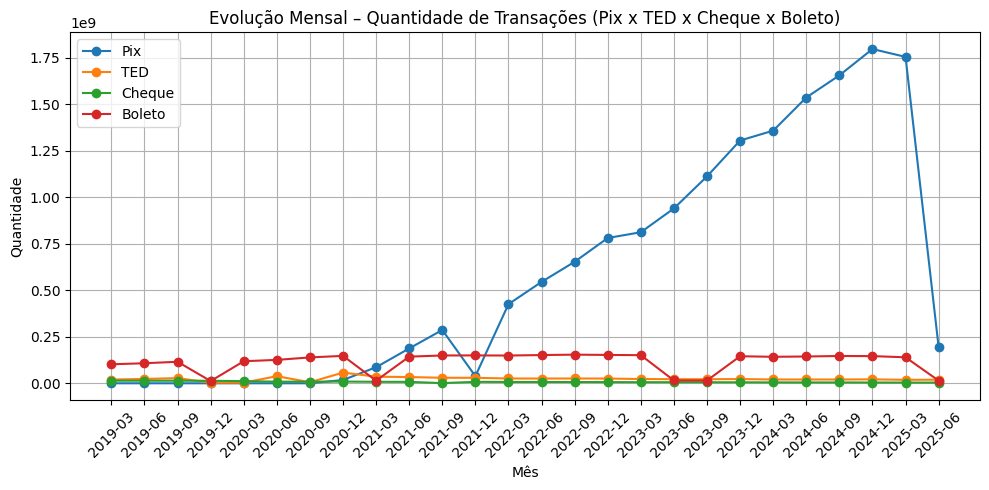

In [27]:
plt.figure(figsize=(10,5))
plt.plot(dados_df["AnoMes"], dados_df["qntPix"], marker="o", label="Pix")
plt.plot(dados_df["AnoMes"], dados_df["qntTED"], marker="o", label="TED")
plt.plot(dados_df["AnoMes"], dados_df["qntCheque"], marker="o", label="Cheque")
plt.plot(dados_df["AnoMes"], dados_df["qntBoleto"], marker="o", label="Boleto")
plt.title("Evolução Mensal – Quantidade de Transações (Pix x TED x Cheque x Boleto)")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comparativo total entre os meios de pagamento

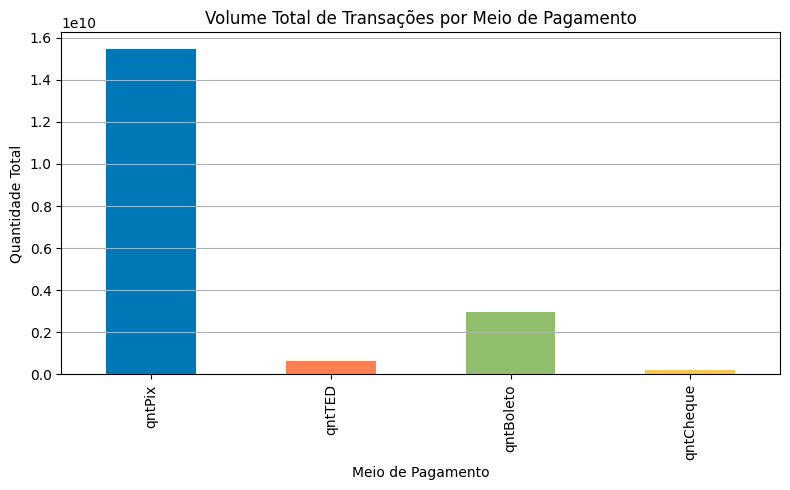

In [28]:
cols_qtd = ["qntPix", "qntTED", "qntBoleto", "qntCheque"]
totais = dados_df[cols_qtd].sum(numeric_only=True)

plt.figure(figsize=(8,5))
totais.plot(kind="bar", color=["#0077b6", "#ff7f51", "#90be6d", "#f9c74f"])
plt.title("Volume Total de Transações por Meio de Pagamento")
plt.ylabel("Quantidade Total")
plt.xlabel("Meio de Pagamento")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Percentual total por meio de pagamento

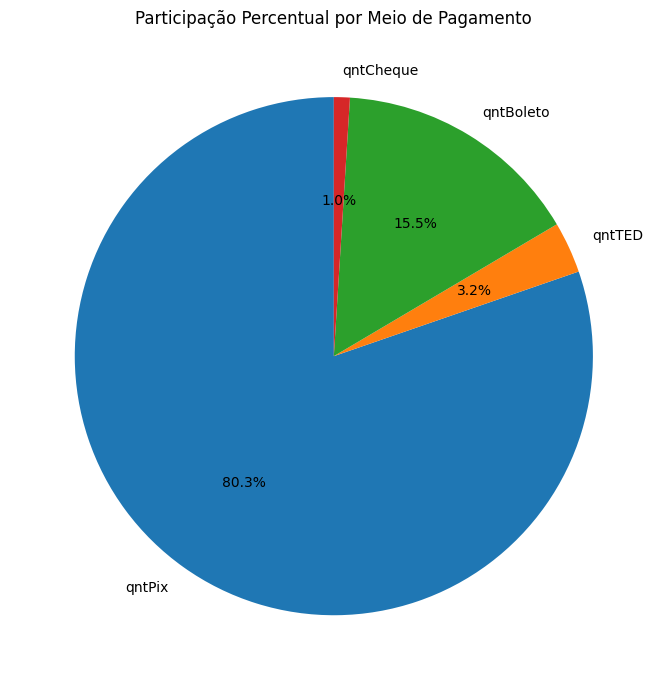

In [29]:
plt.figure(figsize=(7,7))
totais.plot(kind="pie", autopct="%1.1f%%", startangle=90, ylabel="")
plt.title("Participação Percentual por Meio de Pagamento")
plt.tight_layout()
plt.show()